In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras

In [2]:
(train_x , train_y) , (test_x , test_y) = fashion_mnist.load_data()

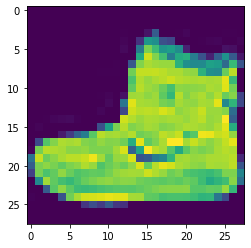

In [3]:
plt.imshow(train_x[0])

In [4]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [5]:
train_y[0]

9

In [6]:
class_names[train_y[0]]

'Ankle boot'

In [7]:
train_x[0].shape

(28, 28)

In [8]:
x_train = train_x/255.
x_test = test_x/255.

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [10]:
x_valid , x_trv = x_train[:5000],x_train[5000:]
y_valid , y_trv = train_y[:5000],train_y[5000:]
x_test = x_test

In [11]:
import tensorflow as tf

In [12]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = tf.keras.models.Sequential()

In [17]:
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [20]:
import pydot
keras.utils.plot_model(model)

ModuleNotFoundError: No module named 'pydot'

In [21]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [22]:
model_h = model.fit(x_valid,y_valid,epochs=30,
                   validation_data=(x_trv,y_trv))

Epoch 1/30
157/157 [==============================] - 2s 15ms/step - loss: 1.5374 - accuracy: 0.5588 - val_loss: 1.0833 - val_accuracy: 0.6793
Epoch 2/30
157/157 [==============================] - 2s 14ms/step - loss: 0.8924 - accuracy: 0.7286 - val_loss: 0.8454 - val_accuracy: 0.7217
Epoch 3/30
157/157 [==============================] - 2s 12ms/step - loss: 0.7285 - accuracy: 0.7624 - val_loss: 0.7148 - val_accuracy: 0.7525
Epoch 4/30
157/157 [==============================] - 2s 13ms/step - loss: 0.6508 - accuracy: 0.7828 - val_loss: 0.6672 - val_accuracy: 0.7661
Epoch 5/30
157/157 [==============================] - 2s 13ms/step - loss: 0.6028 - accuracy: 0.7994 - val_loss: 0.7182 - val_accuracy: 0.7511
Epoch 6/30
157/157 [==============================] - 2s 14ms/step - loss: 0.5724 - accuracy: 0.8140 - val_loss: 0.5950 - val_accuracy: 0.7956
Epoch 7/30
157/157 [==============================] - 2s 13ms/step - loss: 0.5450 - accuracy: 0.8212 - val_loss: 0.5731 - val_accuracy: 0.7989

In [23]:
model_h.params

{'verbose': 1, 'epochs': 30, 'steps': 157}

In [24]:
model_h.history

{'loss': [1.5374408960342407,
  0.8924153447151184,
  0.7284515500068665,
  0.6507648825645447,
  0.6028160452842712,
  0.5723599195480347,
  0.5449979901313782,
  0.5184648633003235,
  0.5024428963661194,
  0.4875234365463257,
  0.46909043192863464,
  0.4582153260707855,
  0.4486458897590637,
  0.4344292879104614,
  0.42209458351135254,
  0.4200882911682129,
  0.41109737753868103,
  0.39895570278167725,
  0.40246108174324036,
  0.38828596472740173,
  0.3820769190788269,
  0.3737315535545349,
  0.3691154420375824,
  0.35866260528564453,
  0.35370540618896484,
  0.35324737429618835,
  0.34803417325019836,
  0.34364476799964905,
  0.33979782462120056,
  0.33720096945762634],
 'accuracy': [0.5587999820709229,
  0.728600025177002,
  0.7623999714851379,
  0.782800018787384,
  0.7993999719619751,
  0.8140000104904175,
  0.8212000131607056,
  0.829200029373169,
  0.8342000246047974,
  0.8378000259399414,
  0.8452000021934509,
  0.8474000096321106,
  0.8500000238418579,
  0.8528000116348267,
 

In [29]:
model.evaluate(x_test,test_y)

313/313 [==============================] - 0s 1ms/step - loss: 0.5038 - accuracy: 0.8246


[0.5038267374038696, 0.8245999813079834]

In [30]:
x_new = x_test[:3]

In [31]:
y_pred = model.predict(x_new)

In [32]:
y_pred.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.11, 0.01, 0.84],
       [0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [33]:
y_p = model.predict_classes(x_new)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [34]:
np.array(class_names)[y_p]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

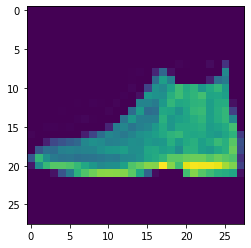

In [37]:
plt.imshow(x_test[0])

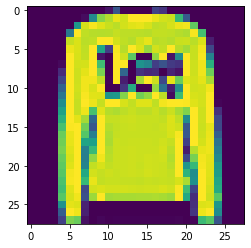

In [38]:
plt.imshow(x_test[1])

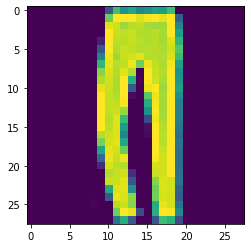

In [39]:
plt.imshow(x_test[2])